# End to End Toy Project

### Importing libraries

In [1]:
import numpy as np
import pandas as pd

### Loading Dataset

In [2]:
df = pd.read_csv('../Data/placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


## Steps
0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

### Data Preprocessing

In [3]:
# Remove the unnamed column
df = df.iloc[:, 1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [5]:
# Import Mathplotlib to plot the data
import matplotlib.pyplot as plt

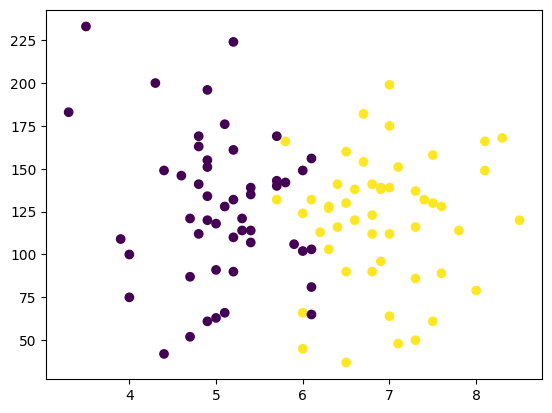

In [7]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [10]:
# Extract the input and output data
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [12]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1)

In [14]:
X_train

,cgpa,iq
90,7.3,86.0
23,4.7,87.0
15,5.1,176.0
99,6.2,113.0
56,6.1,65.0
...,...,...
30,7.6,128.0
82,6.5,37.0
32,7.0,139.0
10,6.0,45.0


In [15]:
X_test

,cgpa,iq
19,5.2,132.0
37,8.1,149.0
8,6.1,156.0
57,6.5,130.0
40,4.9,134.0
76,4.9,155.0
18,4.0,100.0
12,5.4,139.0
43,6.8,141.0
36,5.7,140.0


In [16]:
# Scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train

array([[ 1.12726926, -0.87233421],
       [-1.15654899, -0.84811765],
       [-0.80519233,  1.30715594],
       [ 0.16103847, -0.21848716],
       [ 0.0731993 , -1.38088191],
       [ 0.33671679,  0.45957644],
       [ 0.68807345, -0.24270372],
       [ 0.86375177, -1.40509846],
       [ 0.51239512,  0.38692677],
       [ 1.82998257,  1.06499037],
       [-1.42006648, -1.93786272],
       [-0.01463986, -0.48486929],
       [-0.71735317, -0.29113683],
       [ 0.60023428,  0.77439168],
       [ 0.60023428,  1.45245529],
       [-1.50790564,  1.88835332],
       [ 2.0056609 ,  1.11342349],
       [ 1.74214341, -1.04185011],
       [-0.98087066, -1.47774814],
       [-2.21061895,  2.6874997 ],
       [-0.629514  , -0.1942706 ],
       [ 0.24887763,  0.1447612 ],
       [-1.42006648,  0.6533089 ],
       [-0.71735317,  0.94390759],
       [-0.27815735,  0.50800956],
       [-0.19031819,  0.483793  ],
       [-0.01463986, -1.35666535],
       [-0.71735317, -0.77546798],
       [-0.54167484,

In [18]:
X_train

array([[ 1.12726926, -0.87233421],
       [-1.15654899, -0.84811765],
       [-0.80519233,  1.30715594],
       [ 0.16103847, -0.21848716],
       [ 0.0731993 , -1.38088191],
       [ 0.33671679,  0.45957644],
       [ 0.68807345, -0.24270372],
       [ 0.86375177, -1.40509846],
       [ 0.51239512,  0.38692677],
       [ 1.82998257,  1.06499037],
       [-1.42006648, -1.93786272],
       [-0.01463986, -0.48486929],
       [-0.71735317, -0.29113683],
       [ 0.60023428,  0.77439168],
       [ 0.60023428,  1.45245529],
       [-1.50790564,  1.88835332],
       [ 2.0056609 ,  1.11342349],
       [ 1.74214341, -1.04185011],
       [-0.98087066, -1.47774814],
       [-2.21061895,  2.6874997 ],
       [-0.629514  , -0.1942706 ],
       [ 0.24887763,  0.1447612 ],
       [-1.42006648,  0.6533089 ],
       [-0.71735317,  0.94390759],
       [-0.27815735,  0.50800956],
       [-0.19031819,  0.483793  ],
       [-0.01463986, -1.35666535],
       [-0.71735317, -0.77546798],
       [-0.54167484,

## Logistic Regression
From the scatter plot we understand that we should use Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

# Train the model
clf.fit(X_train, y_train)

LogisticRegression()

In [20]:
## Predict

y_pred = clf.predict(X_test)

y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [21]:
# Evaluate the model
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9

<Axes: >

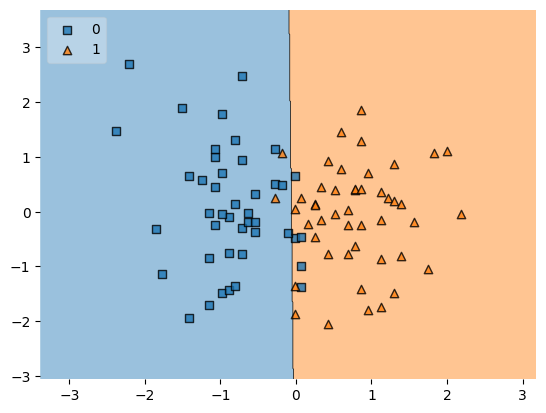

In [24]:
# Decision Boundary
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [27]:
# Save the model to disk using Pickle
import pickle

pickle.dump(clf, open('../Model/model.pkl', 'wb'))